### Importing Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Data Exploration

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Checking if any categorical data

In [6]:
data.select_dtypes(include='object').columns

Index([], dtype='object')

In [7]:
data.select_dtypes(include=['int64','float64']).columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
data.shape

(2000, 21)

### Checking if Any NULL values

In [9]:
data.isnull().values.any()

False

### Countplot, Correlation and HeatmaP

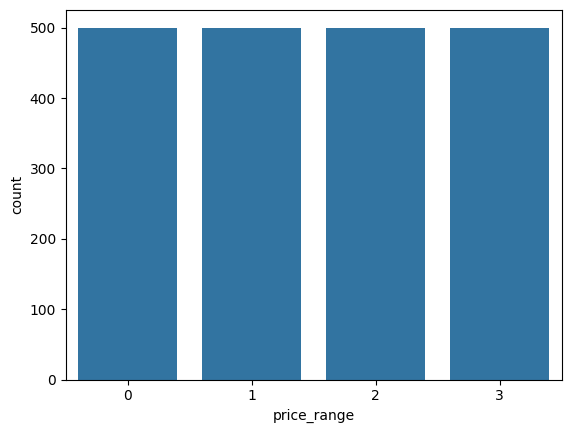

In [10]:
sns.countplot(x='price_range',data=data)
plt.show()

In [11]:
print((data.price_range == 0).sum())
print((data.price_range == 1).sum())
print((data.price_range == 2).sum())
print((data.price_range == 3).sum())

500
500
500
500


<Axes: title={'center': 'Price Range Correlation'}>

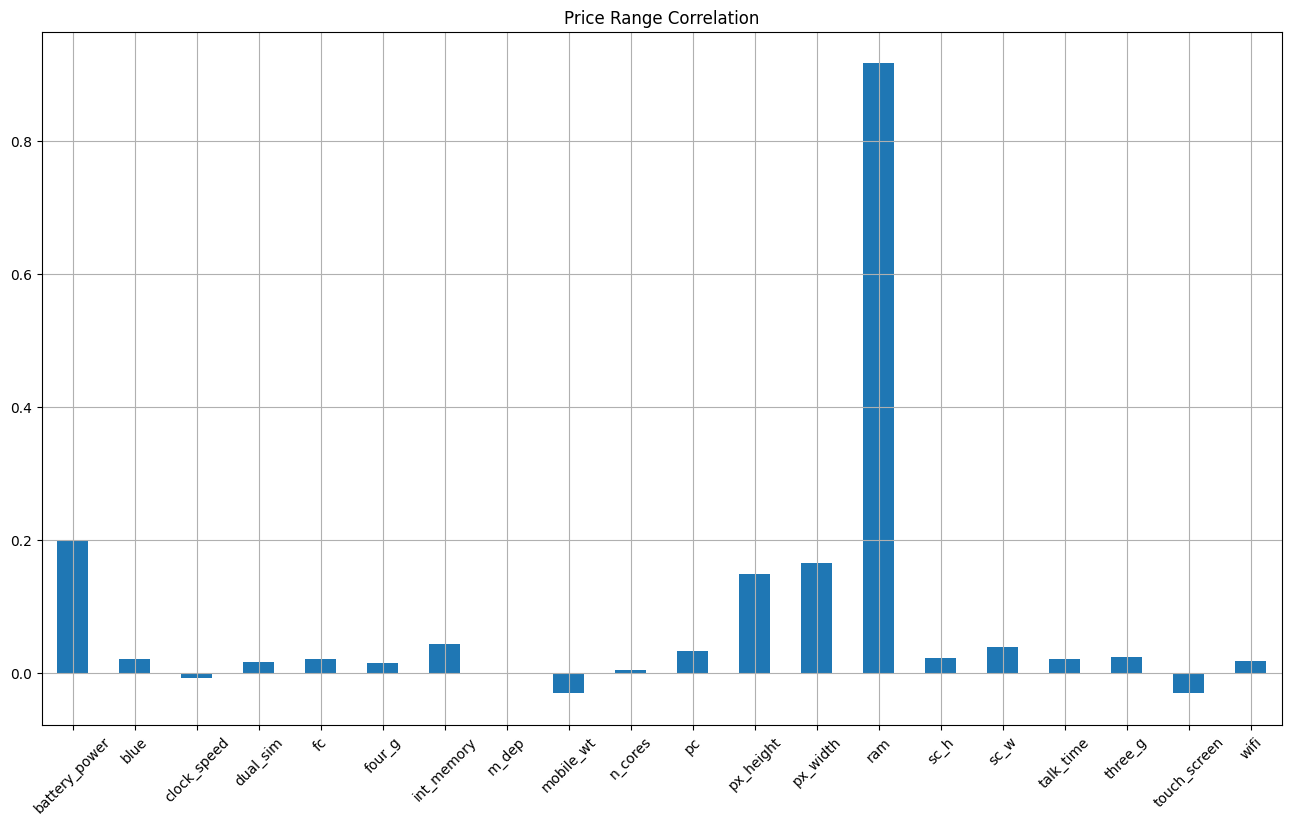

In [12]:
data_temp = data.drop(columns="price_range")
data_temp.corrwith(data["price_range"]).plot.bar(
    figsize = (16,9),
    rot=45,
    title = "Price Range Correlation",
    grid=True
)

<Axes: >

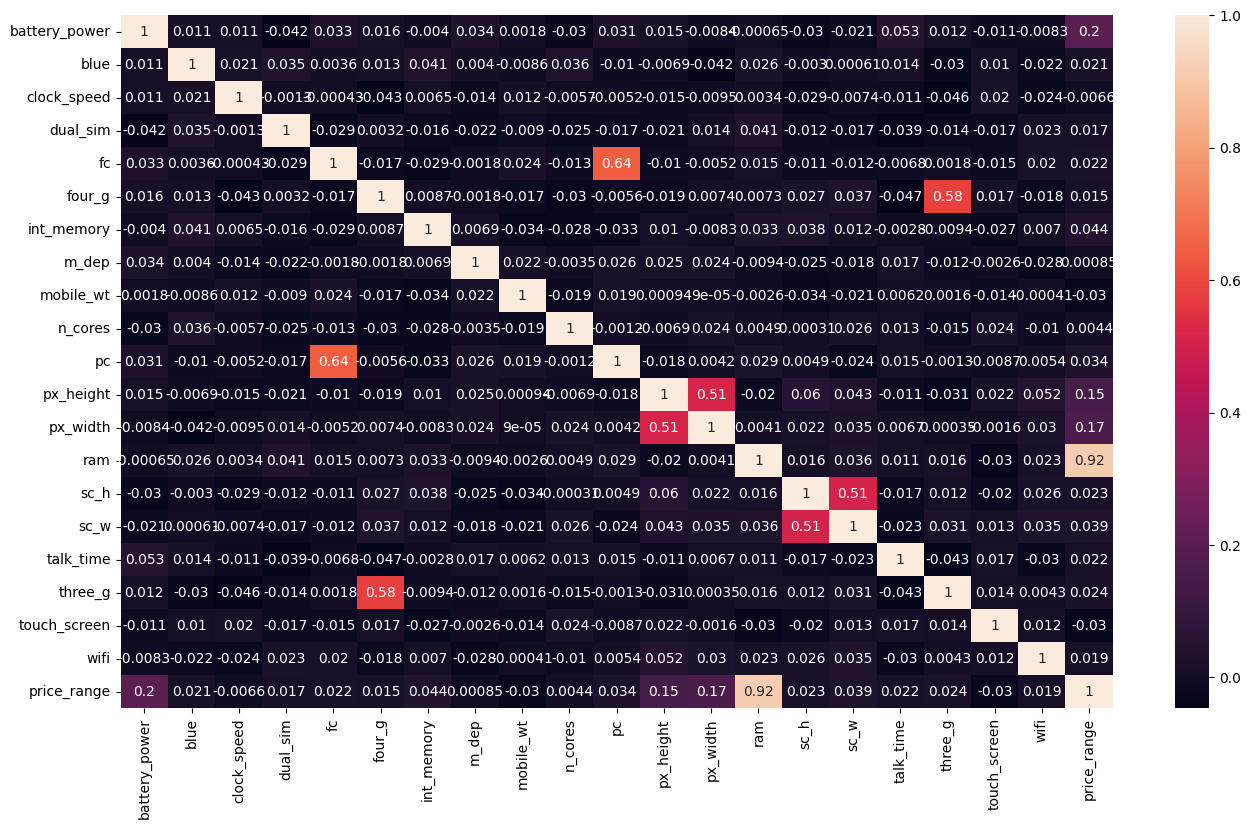

In [13]:
corr = data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

# Train Test Spliting

In [14]:
from sklearn.model_selection import train_test_split
x = data.drop(columns="price_range")
y = data["price_range"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Model Selection

### 1. Using Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train,y_train)
y_pred = classifier_lr.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [19]:
result_1 = pd.DataFrame([["LogisticRegression",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

In [20]:
result_1

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,LogisticRegression,0.955,0.955,0.955,0.955,96.1875,1.4375


### 2. Using RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier_rm = RandomForestClassifier()
classifier_rm.fit(x_train,y_train)
y_pred = classifier_rm.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_rm,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [23]:
result_2 = pd.DataFrame([["RandomForestClassifier",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

In [24]:
result_2

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,RandomForestClassifier,0.8525,0.8525,0.8525,0.8525,87.3125,1.3125


### 3. Using XGBClassifier

In [25]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train,y_train)
y_pred = classifier_xgb.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_xgb,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [27]:
result_3 = pd.DataFrame([["XGBClassifier",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

In [28]:
result_3

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,XGBClassifier,0.915,0.915,0.915,0.915,90.125,0.918559


### 4. Using GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier_gaussian = GaussianNB()
classifier_gaussian.fit(x_train,y_train)
y_pred = classifier_gaussian.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_gaussian,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [31]:
result_4 = pd.DataFrame([["GaussianNB",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

In [32]:
result_4

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,GaussianNB,0.835,0.835,0.835,0.835,80.6875,1.616565


### 5. Using SVC

In [33]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(x_train,y_train)
y_pred = classifier_svc.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_svc,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [35]:
result_5 = pd.DataFrame([["SVC",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

In [36]:
result_5

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,SVC,0.89,0.89,0.89,0.89,87.4375,2.583753


### 6. Using KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(x_train,y_train)
y_pred = classifier_knn.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_knn,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [39]:
result_6 = pd.DataFrame([["KNeighborsClassifier",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

In [40]:
result_6

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,KNeighborsClassifier,0.515,0.515,0.515,0.515,49.75,3.237958


# Hyperparameter Tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'C' : [0.1,0.01,0.5,0.2,1.0,0.75],
    'class_weight' : ['dict', 'balanced']
}

In [42]:
radomized_search = RandomizedSearchCV(estimator=classifier_lr,param_distributions=parameters)

In [43]:
radomized_search.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.01, 0.5, 0.2, 1.0, 0.75],
                                        'class_weight': ['dict', 'balanced'],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']})

In [44]:
radomized_search.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

# Final Model Selection : Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier_final = LogisticRegression(C=0.01, class_weight='balanced', multi_class='multinomial', penalty=None, solver='sag')
classifier_final.fit(x_train,y_train)
y_pred = classifier_final.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,pos_label='positive',average='micro')
rec = recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1 = f1_score(y_test,y_pred,pos_label='positive',average='micro')
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_final,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa

In [47]:
result_final = pd.DataFrame([["Final Logistic Regression",acc,prec,rec,f1,avg_acc,avg_std]],columns=["Model","Accuracy","Precision","Recall","F1 Score","Average Accuracy","Average Standard Devaition"])

In [48]:
result_final

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,Final Logistic Regression,0.965,0.965,0.965,0.965,97.1875,1.194061


# All Results

In [50]:
all_results = [result_1,result_2,result_3,result_4,result_5,result_6,result_final]
final_results = pd.concat(all_results).reset_index(drop=True)
final_results

,Model,Accuracy,Precision,Recall,F1 Score,Average Accuracy,Average Standard Devaition
0,LogisticRegression,0.9550,0.9550,0.9550,0.9550,96.1875,1.437500
1,RandomForestClassifier,0.8525,0.8525,0.8525,0.8525,87.3125,1.312500
2,XGBClassifier,0.9150,0.9150,0.9150,0.9150,90.1250,0.918559
3,GaussianNB,0.8350,0.8350,0.8350,0.8350,80.6875,1.616565
4,SVC,0.8900,0.8900,0.8900,0.8900,87.4375,2.583753
5,KNeighborsClassifier,0.5150,0.5150,0.5150,0.5150,49.7500,3.237958
6,Final Logistic Regression,0.9650,0.9650,0.9650,0.9650,97.1875,1.194061


# Clasiification of Test Data

In [51]:
test_data = pd.read_csv('test.csv')

In [52]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [53]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [54]:
test_data = test_data.drop(columns='id')

In [55]:
y_pred = classifier_final.predict(ss.transform(test_data))